In [4]:
g

NameError: name 'g' is not defined

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

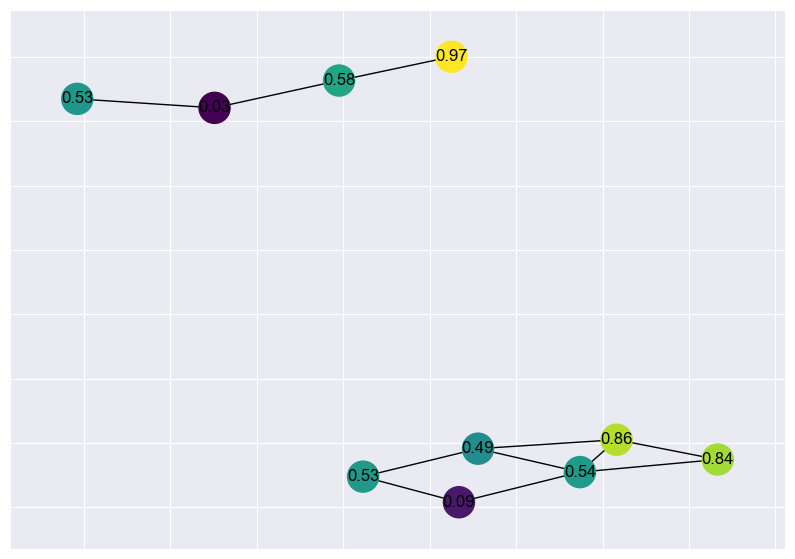

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a graph
G = nx.erdos_renyi_graph(10, 0.3)

# Assume prediction_errors is a dictionary with node keys and error values
prediction_errors = {i: np.random.random() for i in G.nodes()}

# Extract error values
errors = np.array(list(prediction_errors.values()))

# Normalize errors for color mapping
norm = plt.Normalize(errors.min(), errors.max())
cmap = cm.viridis

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(10, 7))

# Draw nodes with color mapping based on prediction error
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=errors, cmap=cmap)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Add labels
labels = {node: f'{prediction_errors[node]:.2f}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(errors)
plt.colorbar(sm, label='Prediction Error')

plt.title("Graph Visualization with Prediction Errors")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Extract error values
errors = errors_all_node_dict["Online_Diffusion"]
# errors = errors_all_node_dict["Online_LSTM"]
# Ensure the errors are in the same order as the nodes in the graph
node_colors = [errors[node] for node in g.nodes()]

# Define positions for each node (example positions, adjust as needed)

# Normalize errors for color mapping
norm = plt.Normalize(min(node_colors), max(node_colors))
cmap = cm.viridis

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=cmap)
nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos, font_size=12)
# Create labels with the prediction errors
labels = {node: f'{errors[node]:.2f}' for node in node_of_interest}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='red')

# color bar
ax = plt.gca()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)
plt.title("Prediction Error")
